# Exploration.07 - 인물 사진 만들기
- 쉘로우 포커스 만들기

- 이미지 세그멘테이션
    - 이미지에서 픽셀 단위로 관심 객체를 추출하는 방법
<br><br>    
- 시맨틱 세그멘테이션
    - 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법
<br><br>
- 인스턴스 세그멘테이션
    - 시맨틱 세그멘테이션으로 분류된 클래스에서를 객체별로 분류
    - 인스턴스 세그멘테이션은 사람 개개인별로 다른 라벨을 가지게 함

## import package

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## PixelLib에서 제공해 주는 모델 다운로드 (PASCAL VOC)

In [2]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f291c2d61f0>)

In [3]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

- 모델 생성
- PASCAL VOC 데이터로 학습된 모델을 이용

# < 1. 인물 사진 만들기 >

## 사진 불러오기

(640, 480, 3)


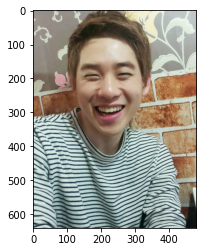

In [4]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/me.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.COLOR_BGR2RGB : opencv는 BGR순으로 색상을 표현하기 때문에 RGB순으로 바꿔줘야 함

## Pascal voc 정보

In [5]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

- Pascal voc의 레이블은 'background', 'aeroplane', 'bicycle', 'bird', 'boat'등 21개로 되어있음
- 21가지의 사물 또는 생물을 구분할 수 있음

## 이미지를 Pascal voc를 통해 시맨틱 세그멘테이션하기

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [7]:
segvalues

{'class_ids': array([ 0, 15, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

- 해당 사진은 Label 0번, 15번, 16번으로 세그멘테이션함
- 0번 : background  /  15번 : person  /  16번 : pottedplant

In [8]:
output.shape

(640, 480, 3)

- output 이미지는 원본 사진과 같이 (640 * 480)사이즈를 가짐
- 3개의 color 채널로 이루어짐
- output에서는 세그멘테이션된 분류별로 다른 색상을 지정해줌

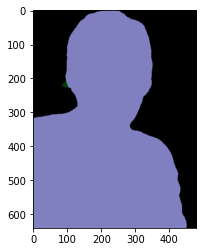

In [9]:
plt.imshow(output)
plt.show()

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
pottedplant


- 검은색 : background
- 보라색 : person
- 초록색 : pottedplant

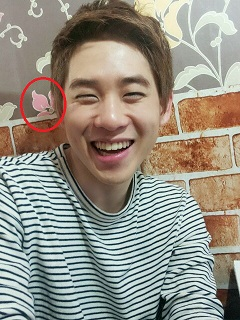

- 벽지에 있는 꽃무늬가 '화분 속 식물'로 분류됨
- 인물사진만 남기고 blur처리할 경우에는 식물도 같이 blur처리 할 예정이므로 문제는 발생하지 않음

## 세그멘테이션 별 색상 정보 알아보기

In [11]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:22]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0],
       [  0,  64, 128],
       [128,  64, 128]])

In [12]:
colormap[15]

array([192, 128, 128])

- 인물 사진을 만들기 위해서 'person'에 해당하는 15번째의 컬러를 확인해봄

## output과 세그멘테이션으로 지정된 색상 비교

In [13]:
seg_color = (128,128,192)

- output 이미지는 BGR 순서로 채널 배치가 되어있음
- colormap은 RGB 순서로 되어있기 때문에 색상 배치를 바꿔줌

(640, 480)


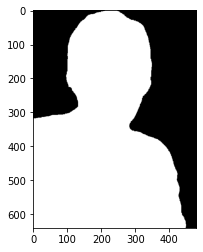

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

- output과 seg_color를 비교하여 같으면 1의 값을 지정 (1은 흰색)
- 나머지는 0의 값을 지정 (0은 검은색)

## 블러 적용

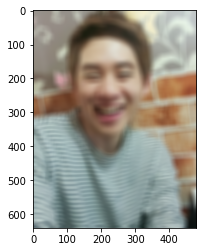

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 결합
- blur처리된 이미지와 부각되어야 하는 이미지를 결합함

In [16]:
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

- 0과 1로 구성된 seg_map의 값을 0과 255의 값을 가지는 이미지 마스크로 변환함
- 각 채널별 컬러는 0~255의 값을 가지기 때문

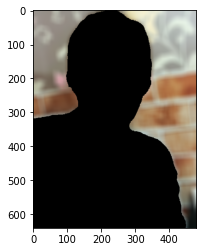

In [17]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) : 회색조의 이미지 마스크를 BGR의 컬러로 전환
- cv2.bitwise_not() : 이미지의 컬러를 보색으로 나타냄 (흰색 -> 검은색)
- cv2.bitwise_and()
    - 서로 공통으로 겹치는 부분 출력
    - True와 True가 겹쳐졌을때 True값을 반환함
    - 이미지 마스크 영역에서 사람은 0값(false)으로 되어 있기 때문에 and로 이미지를 합쳤을 때, 사람영역은 0값(false)를 반환함

https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image
https://rootiel.tistory.com/22

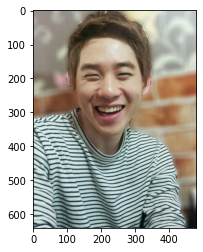

In [18]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- np.where(조건, 참일때, 거짓일때)의 형식의 코드
    - 이미지 마스크에서 255인 값은 img_orig(원본 이미지) 값을 가지고 옴
    - 255가 아닌 값은 img_bg_blur(블러처리된 이미지) 값을 가지고 옴

## 문제점 찾기

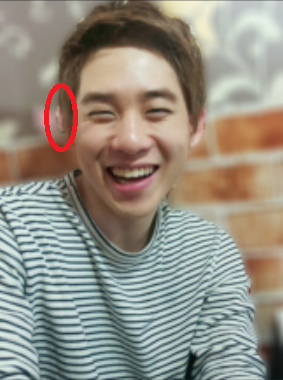

**<문제점>**
- 자세히 보면 벽지의 꽃잎무늬 하나가 인물 사진에 포함되어 있음
- 색상이 피부톤과 비슷하여 귀로 인식했을 가능성도 있다고 생각됨

**<해결책>**
- 스마트폰 카메라 관점 : depth(심도)의 구분이 잘 이뤄질 수 있도록 배경위주로 촬영하는 카메라와 인물위주로 촬영하는 카메라로 구분함
    - depth(심도)를 조금 더 낮춰야함
<br><br>
- 심도와 색상에 대한 계산을 세분화하여 피사체를 좀 더 확실하게 구분해야함

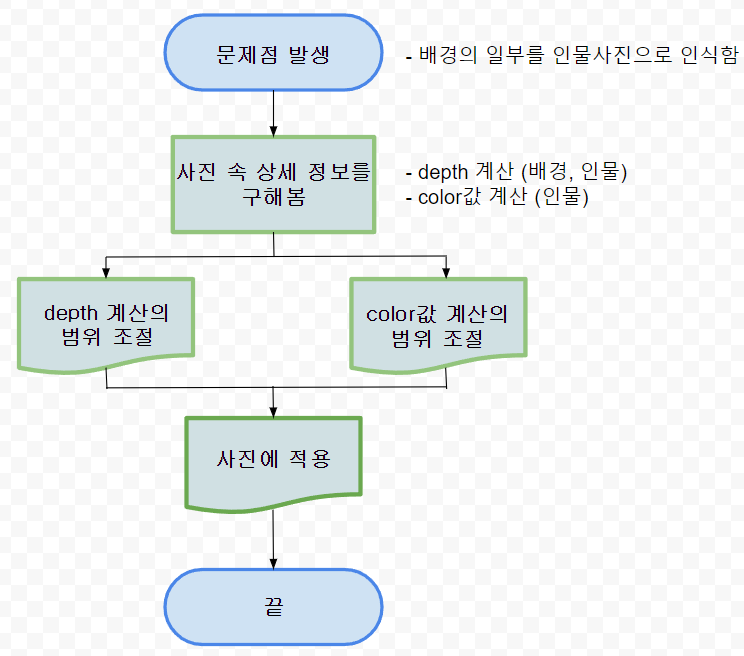

# < 2. 고양이 사진 만들기 >

## 사진 불러오기

(3024, 4032, 3)


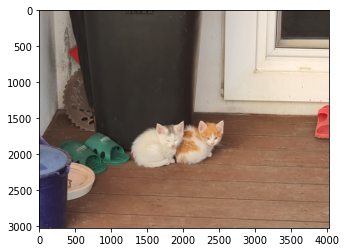

In [19]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat1.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지를 Pascal voc를 통해 시맨틱 세그멘테이션하기

In [20]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [21]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- 해당 사진은 Label 0번, 8번으로 세그멘테이션함
- 0번 : background  /  8번 : cat

In [22]:
output.shape

(3024, 4032, 3)

- output 이미지는 원본 사진과 같이 (3024 * 4032)사이즈를 가짐
- 3개의 color 채널로 이루어짐
- output에서는 세그멘테이션된 분류별로 다른 색상을 지정해줌

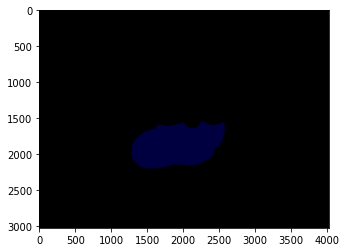

In [23]:
plt.imshow(output)
plt.show()

In [24]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


- 검은색 : background
- 파란색 : cat

In [25]:
colormap[8]

array([64,  0,  0])

- 고양이 사진을 만들기 위해서 'cat'에 해당하는 8번째의 컬러를 확인해봄
- cat의 색상 정보는 [64, 0, 0]임

## output과 세그멘테이션으로 지정된 색상 비교

In [26]:
seg_color = (0,0,64)

- output 이미지는 BGR 순서로 채널 배치가 되어있음
- colormap은 RGB 순서로 되어있기 때문에 색상 배치를 바꿔줌

(3024, 4032)


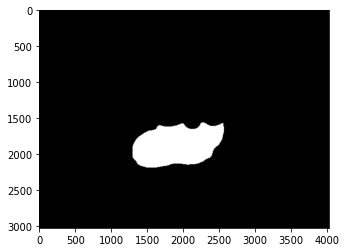

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

- output과 seg_color를 비교하여 같으면 1의 값을 지정 (1은 흰색)
- 나머지는 0의 값을 지정 (0은 검은색)

## 블러 적용

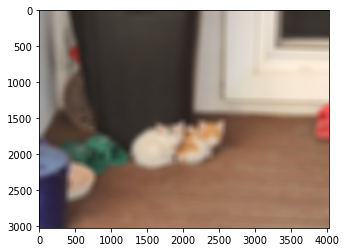

In [28]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (100,100))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 결합
- blur처리된 이미지와 부각되어야 하는 이미지를 결합함

In [29]:
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

- 0과 1로 구성된 seg_map의 값을 0과 255의 값을 가지는 이미지 마스크로 변환함
- 각 채널별 컬러는 0~255의 값을 가지기 때문

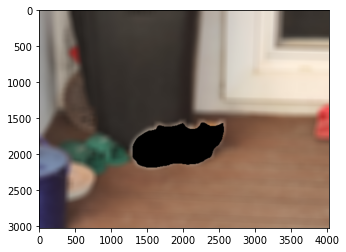

In [30]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) : 회색조의 이미지 마스크를 BGR의 컬러로 전환
- cv2.bitwise_not() : 이미지의 컬러를 보색으로 나타냄 (흰색 -> 검은색)
- cv2.bitwise_and()
    - 서로 공통으로 겹치는 부분 출력
    - True와 True가 겹쳐졌을때 True값을 반환함
    - 이미지 마스크 영역에서 고양이는 0값(false)으로 되어 있기 때문에 and로 이미지를 합쳤을 때, 고양이 영역은 0값(false)를 반환함

https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image
https://rootiel.tistory.com/22

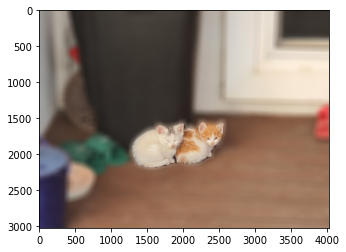

In [31]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- np.where(조건, 참일때, 거짓일때)의 형식의 코드
    - 이미지 마스크에서 255인 값은 img_orig(원본 이미지) 값을 가지고 옴
    - 255가 아닌 값은 img_bg_blur(블러처리된 이미지) 값을 가지고 옴

## 문제점 찾기

- 고양이 사진을 만들 때에는 문제점이 딱히 발생하지 않음
- 내가 생각한 문제점이 없는 원인
    - 배경과 고양이의 색상 구분이 비교적 쉬웠을 것으로 생각됨
    - 역동적이 않고 고양이가 웅크려있어서 엣지를 따기가 비교적 쉬웠을 것으로 생각됨

# < 3. 배경 바꾸기 >

## 사진 불러오기

(351, 526, 3)


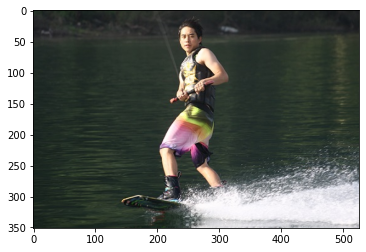

In [32]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/wakeboard2.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지를 Pascal voc를 통해 시맨틱 세그멘테이션하기

In [33]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [34]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- 해당 사진은 Label 0번, 15번으로 세그멘테이션함
- 0번 : background  /  15번 : person

In [35]:
output.shape

(351, 526, 3)

- output 이미지는 원본 사진과 같이 (351 * 526)사이즈를 가짐
- 3개의 color 채널로 이루어짐
- output에서는 세그멘테이션된 분류별로 다른 색상을 지정해줌

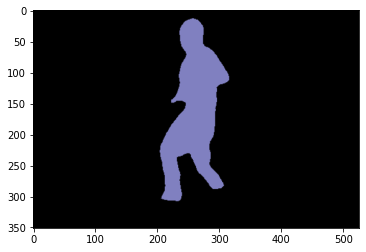

In [36]:
plt.imshow(output)
plt.show()

In [37]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


- 검은색 : background
- 보라색 : person

In [38]:
colormap[15]

array([192, 128, 128])

- 'person'에 해당하는 15번째의 컬러를 확인해봄
- person의 색상 정보는 [192, 128, 128]임

## output과 세그멘테이션으로 지정된 색상 비교

In [39]:
seg_color = (128,128,192)

- output 이미지는 BGR 순서로 채널 배치가 되어있음
- colormap은 RGB 순서로 되어있기 때문에 색상 배치를 바꿔줌

(351, 526)


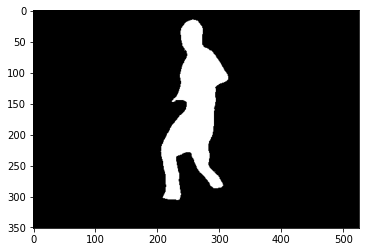

In [40]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

- output과 seg_color를 비교하여 같으면 1의 값을 지정 (1은 흰색)
- 나머지는 0의 값을 지정 (0은 검은색)

In [41]:
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

- 0과 1로 구성된 seg_map의 값을 0과 255의 값을 가지는 이미지 마스크로 변환함
- 각 채널별 컬러는 0~255의 값을 가지기 때문

## 변경할 배경 이미지 가져오기

(478, 720, 3)


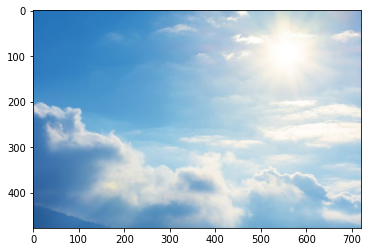

In [42]:
img_path_back = os.getenv('HOME')+'/aiffel/human_segmentation/images/sky2.jpeg'  
img_orig_back = cv2.imread(img_path_back) 

print(img_orig_back.shape)
plt.imshow(cv2.cvtColor(img_orig_back, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 결합

In [43]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_com = cv2.bitwise_and(img_orig_back, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_com, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


- 이미지를 결합하기 위해서는 두 개의 이미지 사이즈가 같아야함

## 배경이미지 사이즈 변경하기

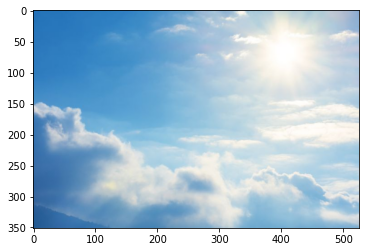

In [44]:
img_orig_back_resize = cv2.resize(img_orig_back, dsize=(526, 351))

plt.imshow(cv2.cvtColor(img_orig_back_resize, cv2.COLOR_BGR2RGB))

- cv2.resize() : 이미지 사이즈를 변경해줌
- 인물 사진 사이즈에 맞춰서 (526, 351)의 사이즈로 변경

## 이미지 결합

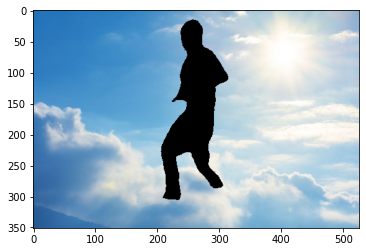

In [45]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_com = cv2.bitwise_and(img_orig_back_resize, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_com, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) : 회색조의 이미지 마스크를 BGR의 컬러로 전환
- cv2.bitwise_not() : 이미지의 컬러를 보색으로 나타냄 (흰색 -> 검은색)
- cv2.bitwise_and()
    - 서로 공통으로 겹치는 부분 출력
    - True와 True가 겹쳐졌을때 True값을 반환함
    - 이미지 마스크 영역에서 사람은 0값(false)으로 되어 있기 때문에 and로 이미지를 합쳤을 때, 사람영역은 0값(false)를 반환함

https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image
https://rootiel.tistory.com/22

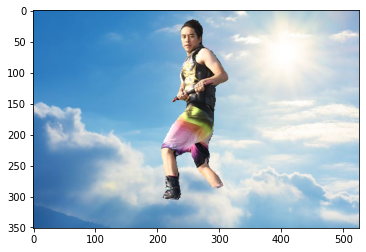

In [46]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_com)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- np.where(조건, 참일때, 거짓일때)의 형식의 코드
    - 이미지 마스크에서 255인 값은 img_orig(원본 이미지) 값을 가지고 옴
    - 255가 아닌 값은 img_bg_com(새로운 배경과 이미지 마스크를 합친 이미지) 값을 가지고 옴

## 문제점 찾기

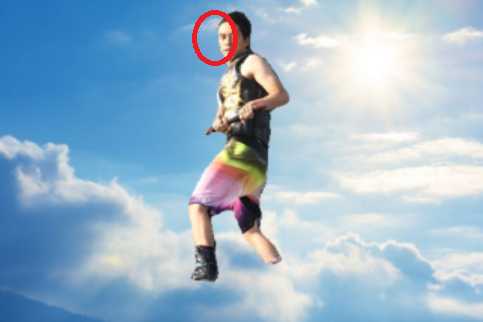

**<문제점>**
- 머리카락의 일부가 사라짐

**<해결책>**
- 스마트폰 카메라 관점 : depth(심도)를 조금 더 높혀서 형태 구분을 잘 할 수 있도록 해야함 
- 인물 사진에서 머리카락을 좀 더 표현할 수 있도록 배경과 인물에 대한 거리를 계산해야함

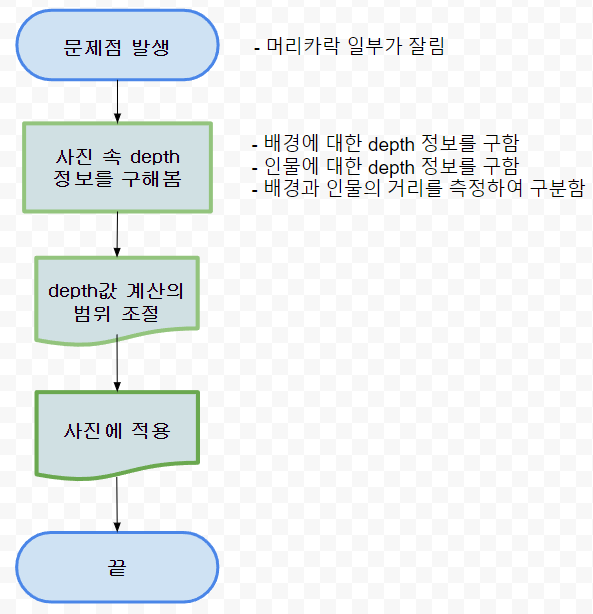

# <4. 이미지 3개 합성하기>
- 고양이, 비행기, background를 합성할 예정

## 사진 불러오기

(637, 998, 3)


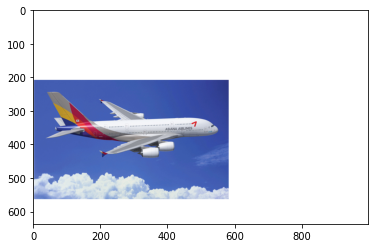

In [47]:
img_path_air = os.getenv('HOME')+'/aiffel/human_segmentation/images/airplane.png'  
img_orig_air = cv2.imread(img_path_air) 

print(img_orig_air.shape)
plt.imshow(cv2.cvtColor(img_orig_air, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지를 Pascal voc를 통해 시맨틱 세그멘테이션하기 (비행기)

In [48]:
segvalues, output = model.segmentAsPascalvoc(img_path_air)

In [49]:
segvalues

{'class_ids': array([0, 1]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- 해당 사진은 Label 0번, 1번으로 세그멘테이션함
- 0번 : background  /  1번 : aeroplane

In [50]:
output.shape

(637, 998, 3)

- output 이미지는 원본 사진과 같이 (637 * 998)사이즈를 가짐
- 3개의 color 채널로 이루어짐
- output에서는 세그멘테이션된 분류별로 다른 색상을 지정해줌

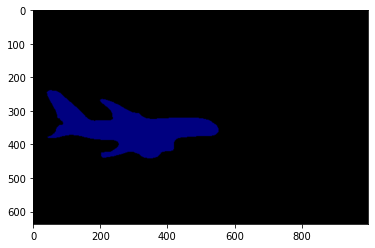

In [51]:
plt.imshow(output)
plt.show()

In [52]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
aeroplane


- 검은색 : background
- 파란색 : aeroplane

In [53]:
colormap[1]

array([128,   0,   0])

- 'aeroplane'에 해당하는 1번째의 컬러를 확인해봄
- aeroplane의 색상 정보는 [128, 0, 0]임

## output과 세그멘테이션으로 지정된 색상 비교 (비행기)

In [54]:
seg_color = (0,0,128)

- output 이미지는 BGR 순서로 채널 배치가 되어있음
- colormap은 RGB 순서로 되어있기 때문에 색상 배치를 바꿔줌

(637, 998)


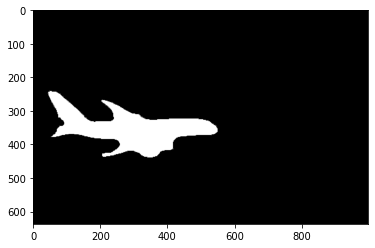

In [55]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

- output과 seg_color를 비교하여 같으면 1의 값을 지정 (1은 흰색)
- 나머지는 0의 값을 지정 (0은 검은색)

In [56]:
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

- 0과 1로 구성된 seg_map의 값을 0과 255의 값을 가지는 이미지 마스크로 변환함
- 각 채널별 컬러는 0~255의 값을 가지기 때문

## 변경할 배경 이미지 가져오기

(400, 700, 3)


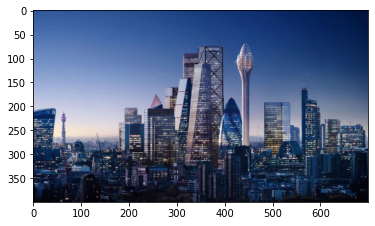

In [57]:
img_path_back = os.getenv('HOME')+'/aiffel/human_segmentation/images/back.png'  
img_orig_back = cv2.imread(img_path_back) 

print(img_orig_back.shape)
plt.imshow(cv2.cvtColor(img_orig_back, cv2.COLOR_BGR2RGB))
plt.show()

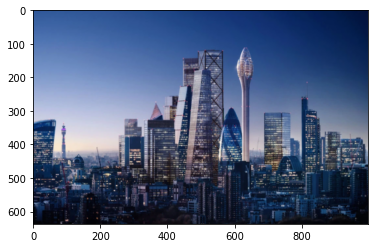

In [58]:
img_orig_back_resize = cv2.resize(img_orig_back, dsize=(998, 637))

plt.imshow(cv2.cvtColor(img_orig_back_resize, cv2.COLOR_BGR2RGB))

- 비행기 이미지와 같은 사이즈로 resize함 (998, 637)

## 이미지 결합 (비행기, background)

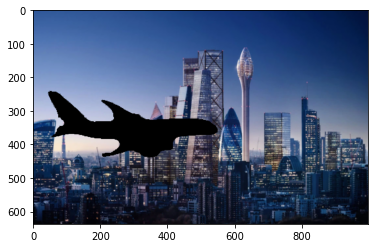

In [59]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_com = cv2.bitwise_and(img_orig_back_resize, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_com, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) : 회색조의 이미지 마스크를 BGR의 컬러로 전환
- cv2.bitwise_not() : 이미지의 컬러를 보색으로 나타냄 (흰색 -> 검은색)
- cv2.bitwise_and()
    - 서로 공통으로 겹치는 부분 출력
    - True와 True가 겹쳐졌을때 True값을 반환함
    - 이미지 마스크 영역에서 비행기는 0값(false)으로 되어 있기 때문에 and로 이미지를 합쳤을 때, 비행기 영역은 0값(false)를 반환함

https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image
https://rootiel.tistory.com/22

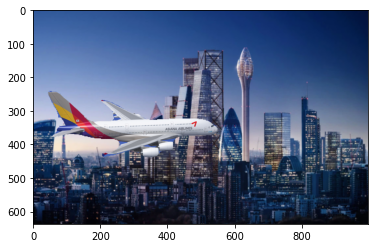

In [60]:
img_concat = np.where(img_mask_color==255, img_orig_air, img_bg_com)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- np.where(조건, 참일때, 거짓일때)의 형식의 코드
    - 이미지 마스크에서 255인 값은 img_orig(원본 이미지) 값을 가지고 옴
    - 255가 아닌 값은 img_bg_com(새로운 배경과 이미지 마스크를 합친 이미지) 값을 가지고 옴

## 고양이 이미지 가져오기

(637, 998, 3)


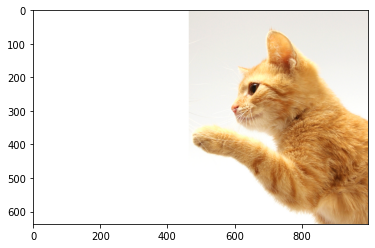

In [61]:
img_path_cat = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat4.png'  
img_orig_cat = cv2.imread(img_path_cat) 

print(img_orig_cat.shape)
plt.imshow(cv2.cvtColor(img_orig_cat, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지를 Pascal voc를 통해 시맨틱 세그멘테이션하기 (고양이)

In [62]:
segvalues2, output2 = model.segmentAsPascalvoc(img_path_cat)

In [63]:
segvalues2

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

- 해당 사진은 Label 0번, 8번으로 세그멘테이션함
- 0번 : background  /  8번 : cat

In [64]:
output2.shape

(637, 998, 3)

- output 이미지는 원본 사진과 같이 (637 * 998)사이즈를 가짐
- 3개의 color 채널로 이루어짐
- output에서는 세그멘테이션된 분류별로 다른 색상을 지정해줌

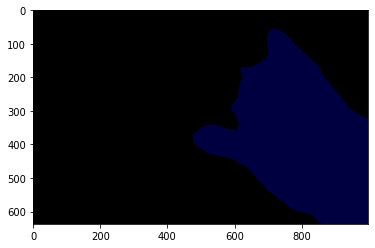

In [65]:
plt.imshow(output2)
plt.show()

In [66]:
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


- 검은색 : background
- 파란색 : cat

In [67]:
colormap[8]

array([64,  0,  0])

- 'cat'에 해당하는 8번째의 컬러를 확인해봄
- cat의 색상 정보는 [64, 0, 0]임

## output과 세그멘테이션으로 지정된 색상 비교 (고양이)

In [68]:
seg_color = (0,0,64)

- output 이미지는 BGR 순서로 채널 배치가 되어있음
- colormap은 RGB 순서로 되어있기 때문에 색상 배치를 바꿔줌

(637, 998)


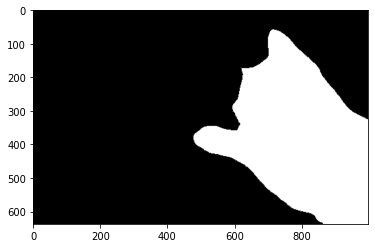

In [69]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output2==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

- output과 seg_color를 비교하여 같으면 1의 값을 지정 (1은 흰색)
- 나머지는 0의 값을 지정 (0은 검은색)

In [70]:
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

- 0과 1로 구성된 seg_map의 값을 0과 255의 값을 가지는 이미지 마스크로 변환함
- 각 채널별 컬러는 0~255의 값을 가지기 때문

## 이미지 결합 ([비행기, background], 고양이)

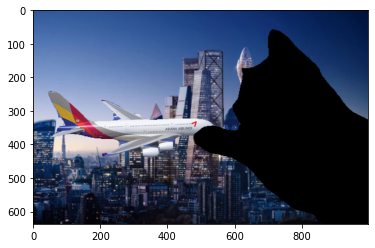

In [71]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_final = cv2.bitwise_and(img_concat, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_final, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) : 회색조의 이미지 마스크를 BGR의 컬러로 전환
- cv2.bitwise_not() : 이미지의 컬러를 보색으로 나타냄 (흰색 -> 검은색)
- cv2.bitwise_and()
    - 서로 공통으로 겹치는 부분 출력
    - True와 True가 겹쳐졌을때 True값을 반환함
    - 이미지 마스크 영역에서 고양이는 0값(false)으로 되어 있기 때문에 and로 이미지를 합쳤을 때, 고양이 영역은 0값(false)를 반환함

https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image
https://rootiel.tistory.com/22

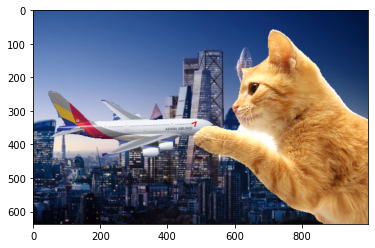

In [72]:
img_concat2 = np.where(img_mask_color==255, img_orig_cat, img_bg_final)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

- np.where(조건, 참일때, 거짓일때)의 형식의 코드
    - 이미지 마스크에서 255인 값은 img_orig(원본 이미지) 값을 가지고 옴
    - 255가 아닌 값은 img_bg_com(새로운 배경과 이미지 마스크를 합친 이미지) 값을 가지고 옴

- 발생된 문제와 해결방안은 위에서 언급했으므로 pass함

## 회고

### 1. 새로 알아갔던 점
 - PixelLib에서 제공하는 모델로 이미지에서 대상을 세그멘테이션 할 수 있다는 것
 - 이미지를 세그멘테이션할 때 종류가 다양하다는 것 (이미지 세그멘테이션, 시맨틱 세그멘테이션, 인스턴스 세그멘테이션 등)


### 2. 흥미로웠던 점
 - 생각보다 대상이 어떤 종류인지 잘 구분했음 (배경, 비행기, 고양이, 사람 등)
 - 배경을 blur처리하는 과정을 직접해보면서 스마트폰 인물사진이 어떻게 적용되는지 알게되었음
 - 3가지 종류의 사진을 합성할 때, 어떻게 표현할지 생각해보는게 흥미로웠음


### 3. 아쉬웠던 점
 - PixelLib에서 제공한 모델이 어떻게 대상을 분류하는지 깊게 알아보지 못함


### 4. 앞으로의 다짐
 - 이미지 분류 방법을 좀 더 깊게 알아보려고 함